In [ ]:
import pandas as pd
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [ ]:
#get the data
!wget -O ChurnData.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv

--2024-01-06 19:21:37--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35943 (35K) [text/csv]
Saving to: ‘ChurnData.csv’

ChurnData.csv       100%[===================>]  35.10K  --.-KB/s    in 0.04s   

2024-01-06 19:21:37 (859 KB/s) - ‘ChurnData.csv’ saved [35943/35943]



In [ ]:
churn_df = pd.read_csv("ChurnData.csv")
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [ ]:
#select some features for modelling
selected_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
selected_df['churn'] = selected_df['churn'].astype(int)
selected_df.head()

<ipython-input-34-1424dc47ef9f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['churn'] = selected_df['churn'].astype(int)


,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [ ]:
x = np.asanyarray(selected_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
y = np.asanyarray(selected_df['churn'])

In [ ]:
#transform the data
x = preprocessing.StandardScaler().fit_transform(x)
x[:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

In [ ]:
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((160, 7), (40, 7), (160,), (40,))

In [ ]:
lr = LogisticRegression(C = 0.01, solver='liblinear')
lr.fit(x_train, y_train)
y_hat = lr.predict(x_test)

In [ ]:
y_hat_probs = lr.predict_proba(x_test)

## Evaluate the model

In [ ]:
#jaccord index
from sklearn.metrics import jaccard_score
jaccard_score(y_test, y_hat, pos_label= 0)

0.75

In [ ]:
jaccard_score(y_test, y_hat, pos_label= 1)

0.5

In [ ]:
sum(y_test == y_hat)/len(y_hat)

0.8

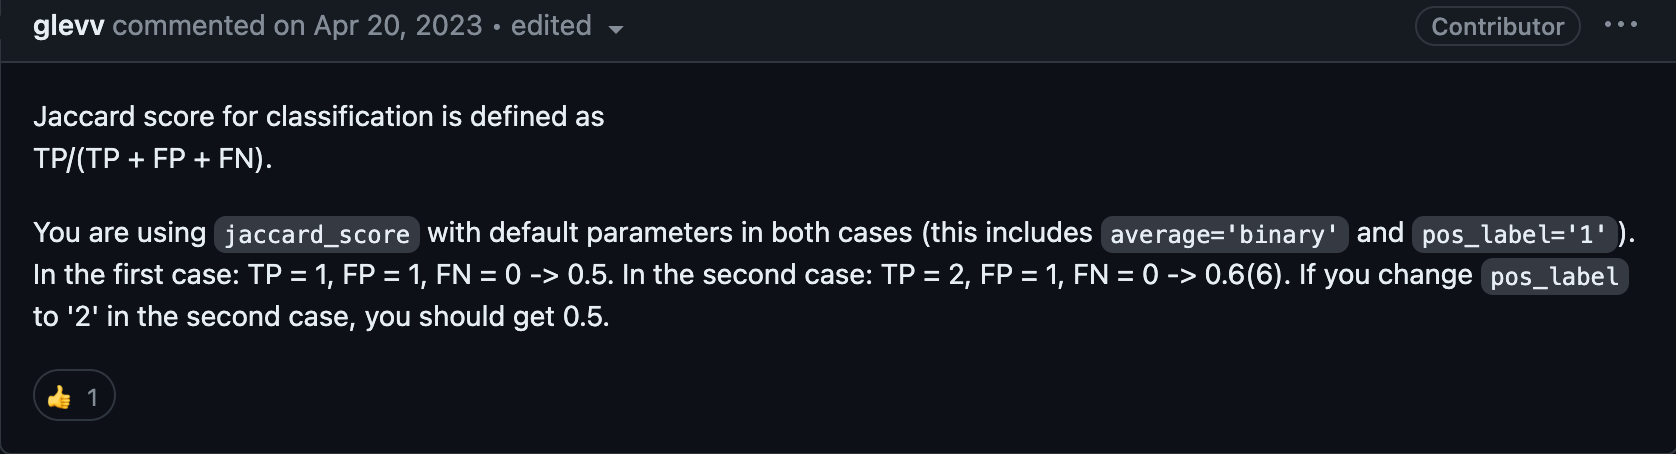

### Confusion matrix

In [ ]:
cm = confusion_matrix(y_test, y_hat, labels =[1,0])

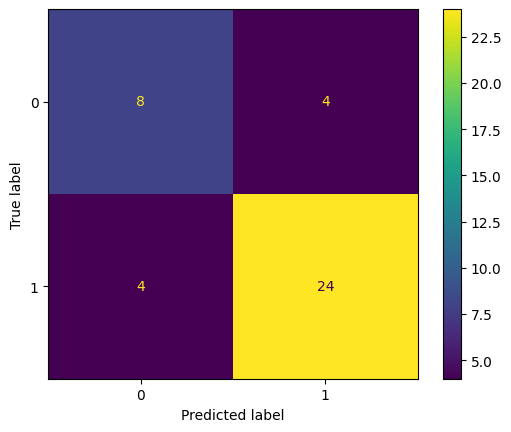

In [ ]:
cmd = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=lr.classes_)
cmd.plot()
plt.show()

### Interpretation of confusion matrix








In [ ]:
print(classification_report(y_test, y_hat))
#our modcel give us 80% accuracy

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        28
           1       0.67      0.67      0.67        12

    accuracy                           0.80        40
   macro avg       0.76      0.76      0.76        40
weighted avg       0.80      0.80      0.80        40



In [ ]:
lr2 = LogisticRegression(C = 0.5, solver='liblinear')
lr2.fit(x_train, y_train)
y_hat = lr2.predict(x_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85        28
           1       0.71      0.42      0.53        12

    accuracy                           0.78        40
   macro avg       0.75      0.67      0.69        40
weighted avg       0.77      0.78      0.75        40



In [ ]:
lr3 = LogisticRegression(C = 0.01, solver='lbfgs')
lr3.fit(x_train, y_train)
y_hat = lr3.predict(x_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82        28
           1       0.00      0.00      0.00        12

    accuracy                           0.70        40
   macro avg       0.35      0.50      0.41        40
weighted avg       0.49      0.70      0.58        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Explanation of C value (Regularization term)

- C is hyperparameter, i need to decide what is the best value based on the tuning. Cross validation is one of the method
- In sklearn , c is the inverse of the regularization term
- If C is large, less penalty when optimizing, model tend to overfit and vice versa
- In summary, C is parameter keeps the balance between simplicity of the model and fit the model very well



